In [433]:
import pandas as pd
import numpy as np
import sqlite3


In [434]:
df = pd.read_csv("monthly.csv")
conn = sqlite3.connect("monthly.db")


In [435]:
df['date'] = pd.to_datetime(df['Year'], format = ("%Y-%m"))
df['unix_epoch'] = df['date'].apply(lambda x : x.timestamp())

In [436]:
df.to_sql('temperature', conn, if_exists = 'replace', index = False)

3823

In [437]:
pd.read_sql('''
SELECT *
FROM temperature
            ''', conn)


,Source,Year,Mean,date,unix_epoch
0,gcag,1850-01,-0.6746,1850-01-01 00:00:00,-3.786826e+09
1,gcag,1850-02,-0.3334,1850-02-01 00:00:00,-3.784147e+09
2,gcag,1850-03,-0.5913,1850-03-01 00:00:00,-3.781728e+09
3,gcag,1850-04,-0.5887,1850-04-01 00:00:00,-3.779050e+09
4,gcag,1850-05,-0.5088,1850-05-01 00:00:00,-3.776458e+09
...,...,...,...,...,...
3818,gcag,2024-03,1.2515,2024-03-01 00:00:00,1.709251e+09
3819,gcag,2024-04,1.2053,2024-04-01 00:00:00,1.711930e+09
3820,gcag,2024-05,1.0745,2024-05-01 00:00:00,1.714522e+09
3821,gcag,2024-06,1.1154,2024-06-01 00:00:00,1.717200e+09


In [438]:
conn.close()

In [439]:
df['unix_epoch']

0      -3.786826e+09
1      -3.784147e+09
2      -3.781728e+09
3      -3.779050e+09
4      -3.776458e+09
            ...     
3818    1.709251e+09
3819    1.711930e+09
3820    1.714522e+09
3821    1.717200e+09
3822    1.719792e+09
Name: unix_epoch, Length: 3823, dtype: float64

In [440]:
df

,Source,Year,Mean,date,unix_epoch
0,gcag,1850-01,-0.6746,1850-01-01,-3.786826e+09
1,gcag,1850-02,-0.3334,1850-02-01,-3.784147e+09
2,gcag,1850-03,-0.5913,1850-03-01,-3.781728e+09
3,gcag,1850-04,-0.5887,1850-04-01,-3.779050e+09
4,gcag,1850-05,-0.5088,1850-05-01,-3.776458e+09
...,...,...,...,...,...
3818,gcag,2024-03,1.2515,2024-03-01,1.709251e+09
3819,gcag,2024-04,1.2053,2024-04-01,1.711930e+09
3820,gcag,2024-05,1.0745,2024-05-01,1.714522e+09
3821,gcag,2024-06,1.1154,2024-06-01,1.717200e+09


In [441]:
#c) Convert data to the format, where the data source is the column header. 
df['gcag'] = np.where(df['Source'] == 'gcag', df['Mean'], np.nan)
df['GISTEMP']= np.where(df['Source'] == 'GISTEMP', df['Mean'], np.nan)

In [442]:
#d) Compare observations from two sources (when both are available).
df[['gcag','GISTEMP']].describe()

,gcag,GISTEMP
count,2095.000000,1728.000000
mean,-0.067996,0.065932
std,0.402120,0.393349
min,-1.044900,-0.820000
25%,-0.346100,-0.220000
50%,-0.155200,-0.030000
75%,0.120600,0.290000
max,1.352200,1.480000


In [443]:
import matplotlib.pyplot as plt

In [444]:
df

,Source,Year,Mean,date,unix_epoch,gcag,GISTEMP
0,gcag,1850-01,-0.6746,1850-01-01,-3.786826e+09,-0.6746,NaN
1,gcag,1850-02,-0.3334,1850-02-01,-3.784147e+09,-0.3334,NaN
2,gcag,1850-03,-0.5913,1850-03-01,-3.781728e+09,-0.5913,NaN
3,gcag,1850-04,-0.5887,1850-04-01,-3.779050e+09,-0.5887,NaN
4,gcag,1850-05,-0.5088,1850-05-01,-3.776458e+09,-0.5088,NaN
...,...,...,...,...,...,...,...
3818,gcag,2024-03,1.2515,2024-03-01,1.709251e+09,1.2515,NaN
3819,gcag,2024-04,1.2053,2024-04-01,1.711930e+09,1.2053,NaN
3820,gcag,2024-05,1.0745,2024-05-01,1.714522e+09,1.0745,NaN
3821,gcag,2024-06,1.1154,2024-06-01,1.717200e+09,1.1154,NaN


In [445]:
df_gcag = df[df['Source'] == 'gcag'].drop(columns = ['GISTEMP'])
df_gistemp = df[df['Source'] == 'GISTEMP'].drop(columns = ['gcag'])


In [446]:
x_df_gcag = df_gcag['date']
y_df_gcag = df_gcag['Mean']
x_df_gistemp = df_gistemp['date']
y_df_gistemp = df_gistemp['Mean']

<function matplotlib.pyplot.show(close=None, block=None)>

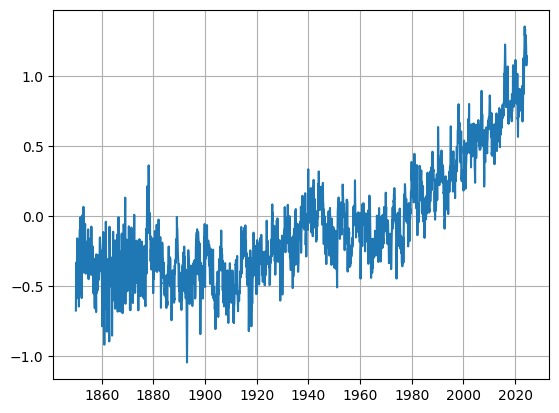

In [447]:
plt.plot(x_df_gcag,y_df_gcag)
plt.grid()
plt.show

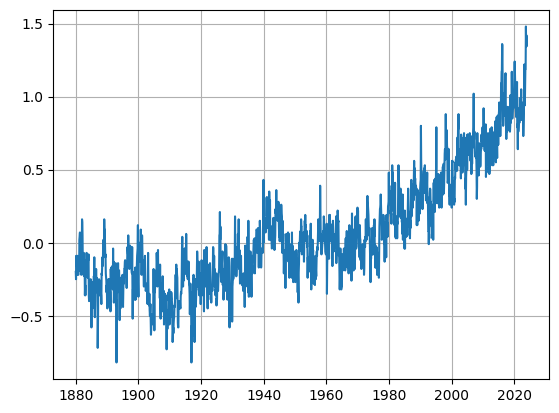

In [448]:
fig, ax = plt.subplots()
ax.plot(x_df_gistemp,y_df_gistemp)
plt.grid()
plt.show()


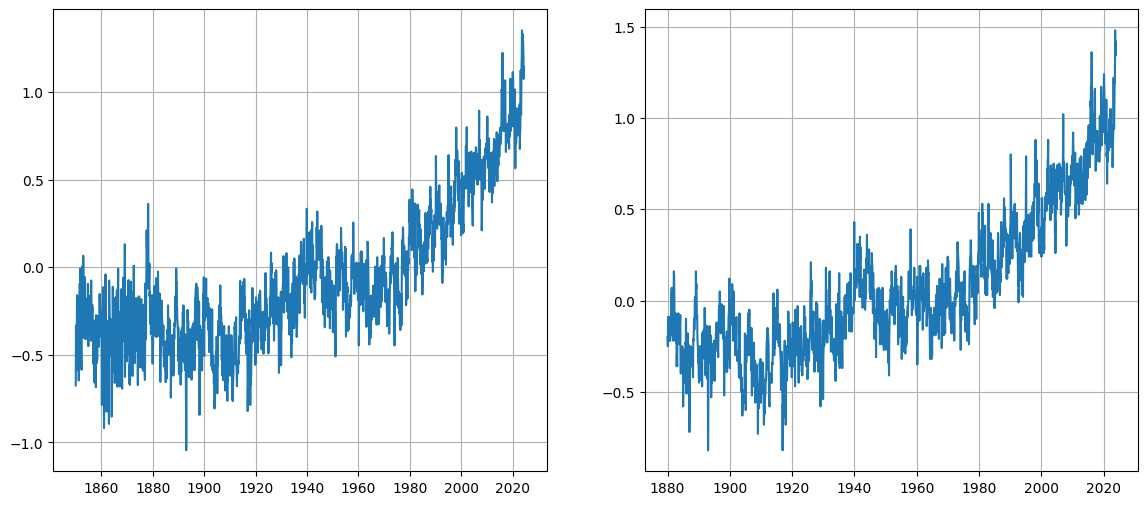

In [449]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
ax1.plot(x_df_gcag, y_df_gcag)
ax1.grid()
ax2.plot(x_df_gistemp, y_df_gistemp)
ax2.grid()
plt.show()

In [450]:
df

,Source,Year,Mean,date,unix_epoch,gcag,GISTEMP
0,gcag,1850-01,-0.6746,1850-01-01,-3.786826e+09,-0.6746,NaN
1,gcag,1850-02,-0.3334,1850-02-01,-3.784147e+09,-0.3334,NaN
2,gcag,1850-03,-0.5913,1850-03-01,-3.781728e+09,-0.5913,NaN
3,gcag,1850-04,-0.5887,1850-04-01,-3.779050e+09,-0.5887,NaN
4,gcag,1850-05,-0.5088,1850-05-01,-3.776458e+09,-0.5088,NaN
...,...,...,...,...,...,...,...
3818,gcag,2024-03,1.2515,2024-03-01,1.709251e+09,1.2515,NaN
3819,gcag,2024-04,1.2053,2024-04-01,1.711930e+09,1.2053,NaN
3820,gcag,2024-05,1.0745,2024-05-01,1.714522e+09,1.0745,NaN
3821,gcag,2024-06,1.1154,2024-06-01,1.717200e+09,1.1154,NaN


In [451]:
df['date'].dt.year


0       1850
1       1850
2       1850
3       1850
4       1850
        ... 
3818    2024
3819    2024
3820    2024
3821    2024
3822    2024
Name: date, Length: 3823, dtype: int32

In [452]:
yearly_mean = df.groupby(df['date'].dt.year).agg(
    gcag = ('Mean', 'mean'),
    gistemp = ('GISTEMP','mean')
    ).reset_index()
yearly_mean['date'] = yearly_mean['date'].astype(float)
yearly_mean.dropna(inplace = True)

In [453]:
x = yearly_mean['date']
y1 = yearly_mean['gcag']
y2 = yearly_mean['gistemp']
coeffs_1 = np.polyfit(x, y1,2)
trend_1 = np.poly1d(coeffs_1)
coeffs_2 = np.polyfit(x, y2, 2)
trend_2 = np.poly1d(coeffs_2)
print(coeffs_2, coeffs_2)

[ 9.01686494e-05 -3.43962043e-01  3.27758076e+02] [ 9.01686494e-05 -3.43962043e-01  3.27758076e+02]


In [ ]:
#Predicting the future
years_2021_2035 = np.arange(2021,2053,1)
y_future_1 = trend_1(years_2021_2035)
y_future_2 = trend_2(years_2021_2035)

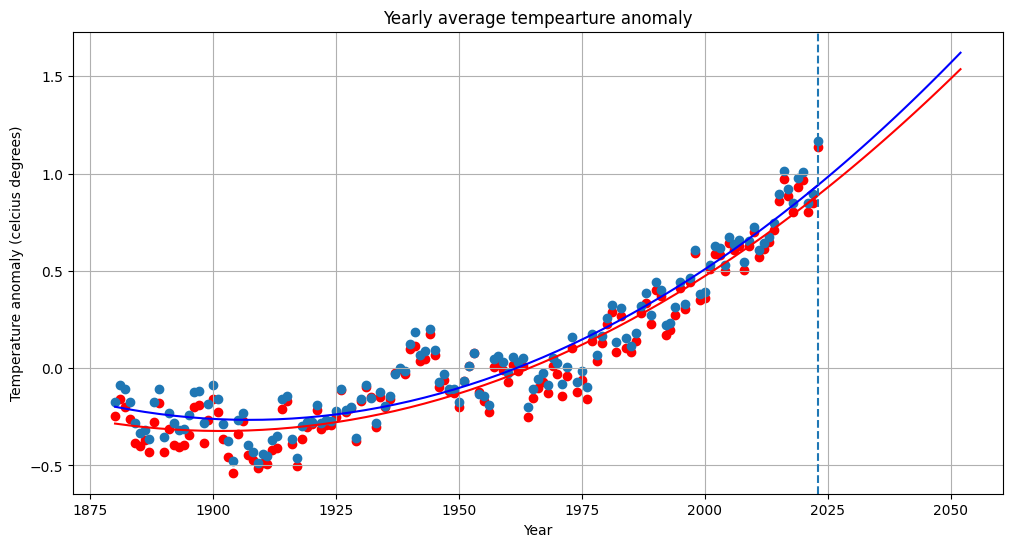

In [470]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(x, y1, label = 'gxag', color = 'red')
ax.scatter(x, y2, label = 'GISTEMP')
ax.plot(x, trend_1(x), color = 'red')
ax.plot(x, trend_2(x), color = 'blue')
ax.plot(years_2021_2035, y_future_1, color = 'red')
ax.plot(years_2021_2035, y_future_2, color = 'blue')
ax.axvline(x = yearly_mean['date'].max(), linestyle = '--')
ax.set_title("Yearly average tempearture anomaly")
ax.set_xlabel("Year")
ax.set_ylabel("Temperature anomaly (celcius degrees)")

ax.grid()
plt.show()